In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [426]:
## 데이터 분석 과정
## 주제--수집--전처리--EDA--예측시스템(회귀,분류)--실제 예측--시각화/서비스구현
## y=ax+b, a는 기울기, b는 y절편, x는 변수값
## y=ax1+cx2+dx3+b
## y=죽을것인가/살것인가에 대한 결과 예측값
## x1,x2,x3가 결과를 결정하는 변수들
## =>age,pclass,alone

In [427]:
raw_data=pd.read_excel('../csv-data/titanic.xls')
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [428]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [429]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [430]:
raw_data['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

Text(0.5, 1.0, 'Survived2')

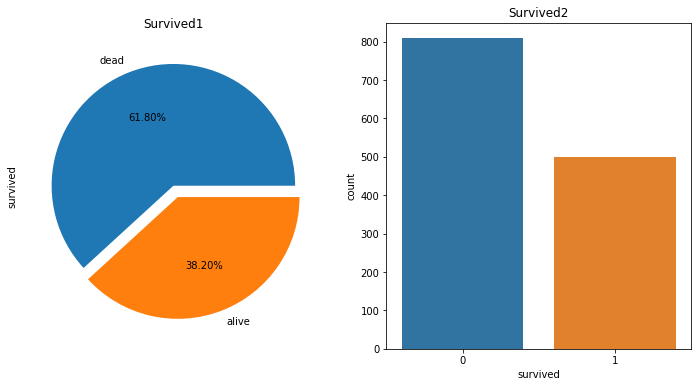

In [431]:
f,ax=plt.subplots(1, 2, figsize=(12,6))
raw_data['survived'].value_counts().plot.pie(labels=['dead','alive'], explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived1')
sns.countplot('survived',data=raw_data, ax=ax[1])
ax[1].set_title('Survived2')

In [432]:
## age의 분포를 그려보세요.

In [433]:
age=raw_data['age'].value_counts()
age.index

Float64Index([  24.0,   22.0,   21.0,   30.0,   18.0,   25.0,   28.0,   36.0,
                27.0,   29.0,   26.0,   19.0,   23.0,   32.0,   20.0,   35.0,
                31.0,   45.0,   33.0,   17.0,   39.0,   16.0,   40.0,   42.0,
                34.0,   50.0,   47.0,   48.0,   38.0,    2.0,   41.0,    1.0,
                44.0,    9.0,   54.0,    4.0,   37.0,   43.0,   49.0,   55.0,
                51.0,   14.0,    3.0,   60.0,   52.0,    8.0,    6.0,   46.0,
                15.0,   58.0,   64.0,   13.0,   61.0,   57.0,   62.0,    5.0,
                32.5,   56.0,   10.0,    7.0,   63.0,   53.0,   11.0,   40.5,
              0.8333,   59.0,   0.75,   65.0,   28.5,   18.5,   12.0,   71.0,
                45.5,   36.5,   34.5,   14.5, 0.9167,   30.5,   70.0,   55.5,
                20.5, 0.4167,   60.5,   23.5,   22.5,   38.5,   66.0,   24.5,
                74.0, 0.1667, 0.3333,   80.0,   11.5,   26.5,   67.0,   70.5,
                76.0, 0.6667],
             dtype='float64')

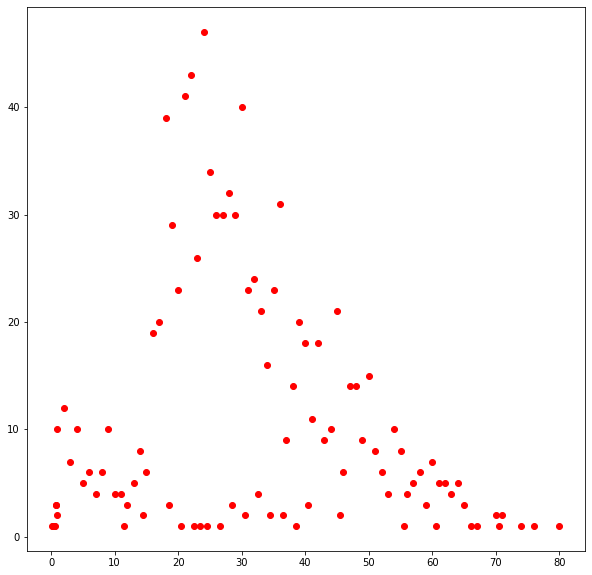

In [434]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(age.index, age.values, 'ro')

In [435]:
## pclass별 평균

In [436]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [437]:
## 변수들간의 상관도

In [438]:
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [439]:
## heatmap

In [440]:
raw_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [441]:
cols=['pclass','survived','age','sibsp','parch','fare','body']

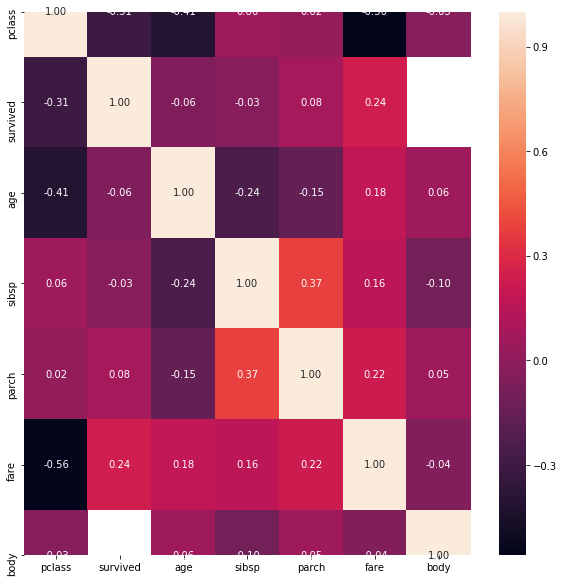

In [442]:
sns.heatmap(
           raw_data.corr().values,
           cbar=True,
           annot=True,
           fmt=".2f",
           xticklabels=cols,
           yticklabels=cols
           )

In [443]:
#성별 카운트
#성별 생사인원

In [444]:
#age가 결측치(NaN)가 들어있는데 어떻게 해야하는가?
# 1.컬럼삭제 : 너무 결측치가 많은 경우, 상관도가 다른 변수들에 비해서 많이 낮은 경우
# 2.행삭제 : 결측치가 있는 instance만 삭제
# 3.다른 값으로 대체 : 대체해도 크게 문제가 없을 때, 다른 instance가 많지 않은 경우
# 다른값 >> 숫자인 경우 : 0(최소값), 평균치(전체 데이터의 분포를 깨지 않을 목적)
#           문자인 경우 : 해당사항 없음, 값을 목록을 만들어서 랜덤하게 넣음.


In [445]:
raw_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [446]:
raw_data['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

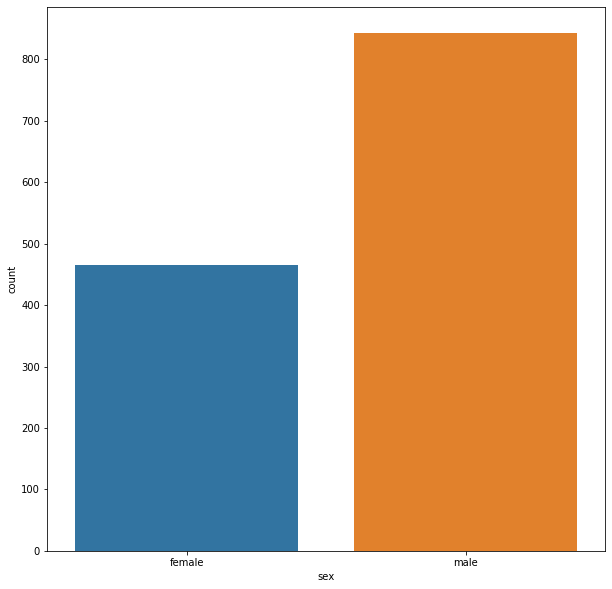

In [447]:
sns.countplot(x=raw_data['sex'])

In [448]:
alive=raw_data.groupby('sex')['survived'].value_counts().to_frame()
alive.columns=['survived_count']
alive=alive.reset_index()

In [449]:
alive

,sex,survived,survived_count
0,female,1,339
1,female,0,127
2,male,0,682
3,male,1,161


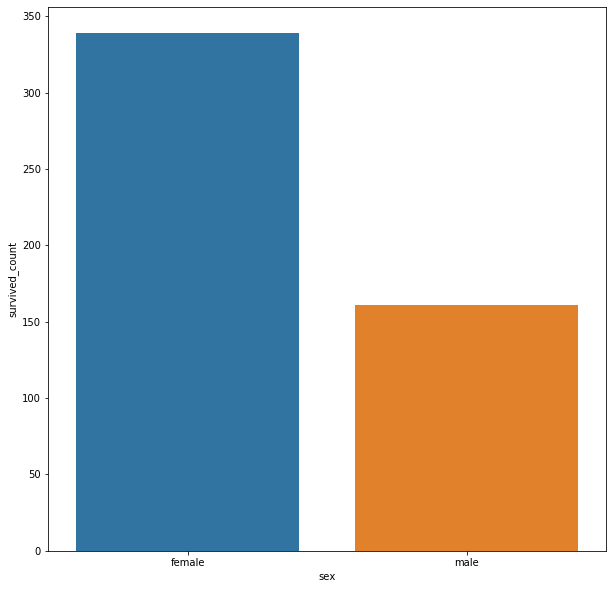

In [450]:
sns.barplot(x='sex', y='survived_count', data=alive[alive['survived']==1])

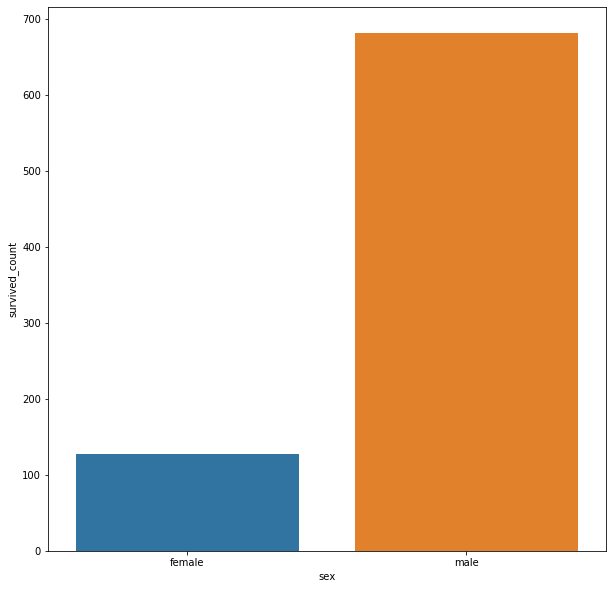

In [451]:
sns.barplot(x='sex', y='survived_count', data=alive[alive['survived']==0])

In [452]:
## 나이를 평균으로 대체하려고 함.
## 나이의 평균을 구해주세요!
## age컬럼 중에 NaN을 평균으로 대체해주세요!
## NaN이 있는지 없는지 결과를 확인

In [453]:
raw_data['age'].mean()

29.8811345124283

In [454]:
raw_data[raw_data['age'].isnull()==True].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [455]:
raw_data['age'][raw_data['age'].isnull()==True]=raw_data['age'].mean()
# raw_data['age'].fillna(raw_data['age'].mean(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [456]:
raw_data['age'].isnull().value_counts()

False    1309
Name: age, dtype: int64

In [457]:
#나이대별 카운트
#나이대별 생사인원

In [458]:
## 나이대별 값의 범위가 너무 많아서 범위를 묶기로 함

In [459]:
raw_data['age_cat']=pd.cut(
                            raw_data['age'],
                            bins=[0,20,35,55,100],
                            include_lowest=True,
                            labels=['children','young','adult','old']
                          )
raw_data[raw_data['age_cat']=='adult']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",adult
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN,adult
1287,3,0,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S,NaN,NaN,NaN,adult
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN,adult
1298,3,0,"Wittevrongel, Mr. Camille",male,36.0,0,0,345771,9.5000,NaN,S,NaN,NaN,NaN,adult


In [460]:
# 컬럼삭제: ticket, cabin, embarked, boat, body, home.dest

In [461]:
raw_data.drop({'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest'}, axis=1, inplace=True)
raw_data

,pclass,survived,name,sex,age,sibsp,parch,fare,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,211.3375,young
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,151.5500,children
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,151.5500,children
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,151.5500,young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,151.5500,young
...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,14.4542,children
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,14.4542,young
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,7.2250,young
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,7.2250,young


In [462]:
#age_cat별 평균을 내보세요.

In [463]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare
age_cat,,,,,,
children,2.568548,0.459677,12.782930,0.991935,0.745968,29.025169
young,2.442490,0.350474,28.124139,0.381597,0.217862,26.865154
adult,1.806084,0.410646,43.699620,0.403042,0.509506,47.149810
old,1.474576,0.322034,62.161017,0.322034,0.406780,70.663722


In [464]:
#데이터 컨버팅

In [465]:
raw_data[:3]

,pclass,survived,name,sex,age,sibsp,parch,fare,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,children
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,children


In [466]:
raw_data.drop('name', axis=1, inplace=True)
raw_data[:3]

,pclass,survived,sex,age,sibsp,parch,fare,age_cat
0,1,1,female,29.0000,0,0,211.3375,young
1,1,1,male,0.9167,1,2,151.5500,children
2,1,0,female,2.0000,1,2,151.5500,children


In [467]:
def func1(x):
    if x=='female':
        return 0
    else:
        return 1

In [468]:
raw_data['sex']=raw_data['sex'].apply(func1)
raw_data[:3]

,pclass,survived,sex,age,sibsp,parch,fare,age_cat
0,1,1,0,29.0000,0,0,211.3375,young
1,1,1,1,0.9167,1,2,151.5500,children
2,1,0,0,2.0000,1,2,151.5500,children


In [469]:
## age_cat 'children':0,'young':1,'adult':2,'old':3

In [470]:
def func2(x):
    if x=='children':
        return 0
    elif x=='young':
        return 1
    elif x=='adult':
        return 2
    else:
        return 3

In [471]:
raw_data['age_cat']=raw_data['age_cat'].apply(func2)
raw_data[:3]

,pclass,survived,sex,age,sibsp,parch,fare,age_cat
0,1,1,0,29.0000,0,0,211.3375,1
1,1,1,1,0.9167,1,2,151.5500,0
2,1,0,0,2.0000,1,2,151.5500,0


In [472]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null int64
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1308 non-null float64
age_cat     1309 non-null category
dtypes: category(1), float64(2), int64(5)
memory usage: 73.2 KB


In [473]:
raw_data['fare'].isnull().sum()

1

In [474]:
raw_data['fare'].fillna(raw_data['fare'].mean(), inplace=True)

In [475]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null int64
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
age_cat     1309 non-null category
dtypes: category(1), float64(2), int64(5)
memory usage: 73.2 KB


In [476]:
raw_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,age_cat
0,1,1,0,29.0000,0,0,211.3375,1
1,1,1,1,0.9167,1,2,151.5500,0
2,1,0,0,2.0000,1,2,151.5500,0
3,1,0,1,30.0000,1,2,151.5500,1
4,1,0,0,25.0000,1,2,151.5500,1


In [477]:
## 1.먼저 공부를 많이 하고(연습용 데이터, 훈련 데이터, train data)
## 2.모의고사(75점) (검증용 데이터, test data)
## ==>data를 나누어보자!
## 3.실제로 예측하는 프로그램 사용 예정 -> 본 시험!

In [478]:
from sklearn.model_selection import train_test_split

In [480]:
df_data=raw_data[['pclass','age','sex','sibsp','parch','fare','survived']]
df_data

,pclass,age,sex,sibsp,parch,fare,survived
0,1,29.000000,0,0,0,211.3375,1
1,1,0.916700,1,1,2,151.5500,1
2,1,2.000000,0,1,2,151.5500,0
3,1,30.000000,1,1,2,151.5500,0
4,1,25.000000,0,1,2,151.5500,0
...,...,...,...,...,...,...,...
1304,3,14.500000,0,1,0,14.4542,0
1305,3,29.881135,0,1,0,14.4542,0
1306,3,26.500000,1,0,0,7.2250,0
1307,3,27.000000,1,0,0,7.2250,0


In [486]:
df_data[['pclass','age','sex','sibsp','parch','fare']]

,pclass,age,sex,sibsp,parch,fare
0,1,29.000000,0,0,0,211.3375
1,1,0.916700,1,1,2,151.5500
2,1,2.000000,0,1,2,151.5500
3,1,30.000000,1,1,2,151.5500
4,1,25.000000,0,1,2,151.5500
...,...,...,...,...,...,...
1304,3,14.500000,0,1,0,14.4542
1305,3,29.881135,0,1,0,14.4542
1306,3,26.500000,1,0,0,7.2250
1307,3,27.000000,1,0,0,7.2250


In [488]:
exam=df_data.iloc[:,:6]
exam

,pclass,age,sex,sibsp,parch,fare
0,1,29.000000,0,0,0,211.3375
1,1,0.916700,1,1,2,151.5500
2,1,2.000000,0,1,2,151.5500
3,1,30.000000,1,1,2,151.5500
4,1,25.000000,0,1,2,151.5500
...,...,...,...,...,...,...
1304,3,14.500000,0,1,0,14.4542
1305,3,29.881135,0,1,0,14.4542
1306,3,26.500000,1,0,0,7.2250
1307,3,27.000000,1,0,0,7.2250


In [ ]:
## 훈련, 검증용 데이터를 분류
## 문제+답
## 훈련문제+훈련답
## 검증문제+검증답

In [504]:
import random
random.seed(100)
for _ in range(10):
    print(random.randint(1, 10), end=' ')

3 8 8 3 7 6 7 9 2 9 

In [544]:
# 훈련문제,검증문제,훈련답,검증답 순서로 리턴
# X_train, X_test, y_train, y_test
train_exam, test_exam, train_target, test_target=train_test_split(exam, #문제 
                 df_data['survived'], #정답
                 test_size=0.2, # 20%가 테스트 데이터, 나머지 80%는 훈련용 데이터
                 random_state=42 # 시드값, 42에 해당하는 랜덤 데이터셋을 적용
                )

In [545]:
train_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 772 to 1126
Data columns (total 6 columns):
pclass    1047 non-null int64
age       1047 non-null float64
sex       1047 non-null int64
sibsp     1047 non-null int64
parch     1047 non-null int64
fare      1047 non-null float64
dtypes: float64(2), int64(4)
memory usage: 57.3 KB


In [546]:
train_target.count()

1047

In [547]:
test_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 1148 to 199
Data columns (total 6 columns):
pclass    262 non-null int64
age       262 non-null float64
sex       262 non-null int64
sibsp     262 non-null int64
parch     262 non-null int64
fare      262 non-null float64
dtypes: float64(2), int64(4)
memory usage: 14.3 KB


In [548]:
test_target.count()

262

In [549]:
## 공부방법 선택: 공부방법이 정형화된 것(알고리즘, 방법론, 모델링)
## 공부 방법론이 많으므로 컴퓨터가 학습할 방법론을 선택해서알려주어야 함.
## 방법론은 클래스로 만들어져있음.

In [550]:
train_exam.head()

,pclass,age,sex,sibsp,parch,fare
772,3,17.000000,1,0,0,7.8958
543,2,36.000000,1,0,0,10.5000
289,1,18.000000,0,0,2,79.6500
10,1,47.000000,1,1,0,227.5250
147,1,29.881135,1,0,0,42.4000


In [551]:
train_exam.reset_index(inplace=True)
train_exam.drop('index',axis=1, inplace=True)

test_exam.reset_index(inplace=True)
test_exam.drop('index',axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [552]:
test_exam

,pclass,age,sex,sibsp,parch,fare
0,3,35.000000,1,0,0,7.1250
1,3,20.000000,1,1,1,15.7417
2,3,29.881135,1,0,0,7.8958
3,3,29.881135,1,0,0,8.0500
4,3,29.881135,1,0,0,7.7500
...,...,...,...,...,...,...
257,2,28.000000,0,0,0,12.6500
258,1,23.000000,1,0,1,63.3583
259,3,21.000000,0,0,0,7.6500
260,1,50.000000,1,1,1,211.5000


In [553]:
train_target=train_target.reset_index()
del train_target['index']
train_target.head()

,survived
0,0
1,0
2,1
3,0
4,0


In [554]:
test_target=test_target.reset_index()
del test_target['index']
test_target.head()

,survived
0,0
1,1
2,0
3,0
4,0


In [556]:
from sklearn.tree import DecisionTreeClassifier

In [664]:
tree_clf=DecisionTreeClassifier(max_depth=3, random_state=42) #트리 깊이 3, 시드 42, 파라미터 값은 생략 가능

In [581]:
tree_clf.fit(train_exam, train_target) #많이 공부!!

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [582]:
tree_clf.score(train_exam, train_target) 
#많이 공부한 것에 대한 점수
#train data에 대한 정확도!(accuracy, 어큐러시)

0.8261700095510984

In [583]:
from sklearn.metrics import accuracy_score

In [584]:
com_target=tree_clf.predict(test_exam) #모의고사를 풀어보자! -> 문제를 푼 답!
com_target[:5]
#검증용 데이터로 검증
#검증해본 결과 test data에 대한 정확도
#컴퓨터가 예측한 값들과 검증용 데이터의 정답과의 비교, 정확도를 계산할 예정

array([0, 0, 0, 0, 0], dtype=int64)

In [601]:
accuracy_score(test_target, com_target) #문제를 푼 답과 정답지를 비교해서 채점!
#정확도, 정답률

0.7786259541984732

In [586]:
train_exam.columns

Index(['pclass', 'age', 'sex', 'sibsp', 'parch', 'fare'], dtype='object')

In [587]:
dicaprio=[3,19,1,0,0,5]

In [588]:
result1=tree_clf.predict_proba([dicaprio])
## 결과는 index순으로 보면 됨. index 0(죽음)일 가능성 100%, index 1(살았음)일 가능성 0%

In [589]:
result1[0][0] ## 죽었을 가능성

0.8862275449101796

In [590]:
result1[0][1] ## 살았을 가능성

0.11377245508982035

In [596]:
def func3(r):
    if r[0][0]>r[0][1]:
        print('죽을 가능성이 더 높다.')
        print('가능성 지수는', int(r[0][0]*100),'%')
    else:
        print('살 가능성이 더 높다.')
        print('가능성 지수는', int(r[0][1]*100),'%')

In [597]:
func3(result1)

죽을 가능성이 더 높다.
가능성 지수는 88 %


In [592]:
winslet=[1,17,0,1,1,100]

In [594]:
result2=tree_clf.predict_proba([winslet]) #winslet은 살았음.
result2

array([[0.01834862, 0.98165138]])

In [598]:
func3(result2)

살 가능성이 더 높다.
가능성 지수는 98 %


In [600]:
## predict_proba함수의 입력타입은 [[]] 2차원 리스트가 되어야 함.
result3=tree_clf.predict_proba([dicaprio,winslet]) #winslet은 살았음.
result3 ##결과도 무조건 [[]] 2차원 리스트

array([[0.88622754, 0.11377246],
       [0.01834862, 0.98165138]])

In [602]:
print(tree_clf.feature_importances_) 
#각 컬럼('pclass', 'age', 'sex', 'sibsp', 'parch', 'fare')에 대한 가중치 
# (y = ax1 + cx2 + dx3 + ex4 + fx5 + gx6 + b)

[0.20997326 0.06080062 0.63232965 0.04431166 0.         0.05258481]


In [603]:
# 가중치가 거의 없었던 피쳐(항목)는 'sibsp', 'parch', 'fare', 'age'
# 가중치가 중간 정도 있었던 피쳐는 'pclass'
# 가중치가 제일 컸던 피쳐는 'sex'

In [604]:
# 그래프로 그려보세요

In [627]:
x=['pclass', 'age', 'sex', 'sibsp', 'parch', 'fare']
importances=pd.DataFrame(tree_clf.feature_importances_,x)
importances=importances.reset_index()
importances.columns=['columns','importance']

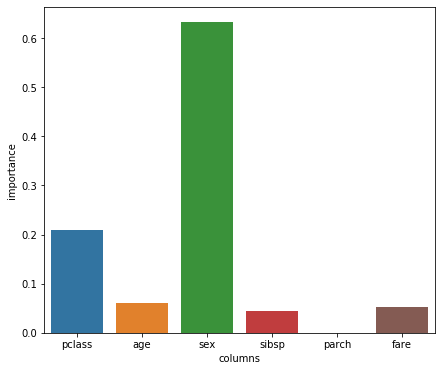

In [628]:
plt.figure(figsize=(7, 6))
sns.barplot(x='columns', y='importance', data=importances)
#weight: 가중치, 각 항목이 예측을하는데 얼마나 영향력을 미쳤는가 정도

In [629]:
me=[3,27,1,0,0,5]
func3(tree_clf.predict_proba([me]))

죽을 가능성이 더 높다.
가능성 지수는 88 %


In [630]:
iris=sns.load_dataset('iris')

In [631]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [632]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [634]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [636]:
exam=iris.iloc[:,:4]
exam

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [644]:
# 훈련문제,검증문제,훈련답,검증답 순서로 리턴
# X_train, X_test, y_train, y_test
train_exam, test_exam, train_target, test_target=train_test_split(exam, #문제 
                 iris['species'], #정답
                 test_size=0.2, # 20%가 테스트 데이터, 나머지 80%는 훈련용 데이터
                 random_state=77 # 시드값, 77에 해당하는 랜덤 데이터셋을 적용
                )

In [647]:
train_exam

,sepal_length,sepal_width,petal_length,petal_width
72,6.3,2.5,4.9,1.5
129,7.2,3.0,5.8,1.6
48,5.3,3.7,1.5,0.2
142,5.8,2.7,5.1,1.9
149,5.9,3.0,5.1,1.8
...,...,...,...,...
19,5.1,3.8,1.5,0.3
117,7.7,3.8,6.7,2.2
37,4.9,3.6,1.4,0.1
84,5.4,3.0,4.5,1.5


In [648]:
train_exam.reset_index(inplace=True)
del train_exam['index']

test_exam.reset_index(inplace=True)
del test_exam['index']

train_target=train_target.reset_index()
del train_target['index']

test_target=test_target.reset_index()
del test_target['index']

In [768]:
tree_clf=DecisionTreeClassifier(max_depth=2, random_state=86)

In [769]:
tree_clf.fit(train_exam, train_target) #많이 공부!!

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=86, splitter='best')

In [770]:
tree_clf.score(train_exam, train_target) 
#많이 공부한 것에 대한 점수
#train data에 대한 정확도!(accuracy, 어큐러시)

0.9833333333333333

In [771]:
com_target=tree_clf.predict(test_exam) #모의고사를 풀어보자! -> 문제를 푼 답!
accuracy_score(test_target, com_target) #문제를 푼 답과 정답지를 비교해서 채점!
#정확도, 정답률

0.8666666666666667

In [772]:
train_exam.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [773]:
flower1=[1, 5, 7, 5]

In [774]:
result1=tree_clf.predict_proba([flower1])
result1

array([[0.        , 0.02702703, 0.97297297]])

In [775]:
def func4(r):
    max_value=int(max(r[0])*100)
    species=iris['species'].unique()[list(r[0]).index(max(r[0]))]
    print("품종이 '{0}'일 확률이 {1}%로 가장 높습니다.".format(species, max_value))

In [776]:
func4(result1)

품종이 'virginica'일 확률이 97%로 가장 높습니다.


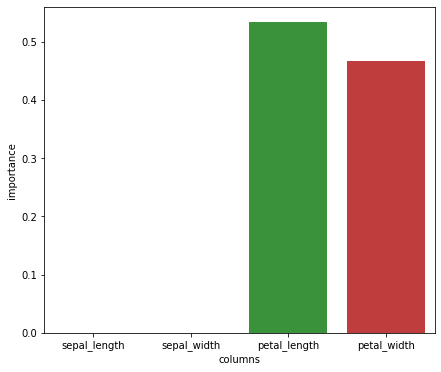

In [777]:
x=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
importances=pd.DataFrame(tree_clf.feature_importances_,x)
importances=importances.reset_index()
importances.columns=['columns','importance']

plt.figure(figsize=(7, 6))
sns.barplot(x='columns', y='importance', data=importances)

In [778]:
tree_clf.feature_importances_

array([0.        , 0.        , 0.53354685, 0.46645315])